# Base:

In [ ]:
# Importar drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar base
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/proyecto PPP/Datos/Bases finales/df_Semana_16.csv')

# Mostramos base
df

Mounted at /content/drive


año  family id  family member id                   practitioner  \
0     2021       6742              7937  angelasalgado@municoquimbo.cl   
1     2021       6743              7938  angelasalgado@municoquimbo.cl   
2     2021       6833              8039           ncampos@mpudahuel.cl   
3     2021       6942              8147   tsgerardocontreras@gmail.com   
4     2021       6943              8149              beitael@gmail.com   
...    ...        ...               ...                            ...   
7676  2022      12963             14546    camila.duquearias@gmail.com   
7677  2022      12985             14572    camila.duquearias@gmail.com   
7678  2022      13215             14818   yinelalobossalazar@gmail.com   
7679  2022      13217             14820   yinelalobossalazar@gmail.com   
7680  2022      13218             14821   yinelalobossalazar@gmail.com   

         edad  género beneficio                            education  \
0     25 - 34   Mujer        Sí                      Enseñanza media   
1     25 - 34   Mujer        Sí                      Enseñanza media   
2     25 - 34   Mujer        No  Formación técnica de nivel superior   
3     25 - 34   Mujer        Sí            Liceo técnico-profesional   
4     35 - 44  Hombre        No  Formación técnica de nivel superior   
...       ...     ...       ...                                  ...   
7676  25 - 34   Mujer        No                     Enseñanza básica   
7677  25 - 34   Mujer        No                     Enseñanza básica   
7678  35 - 44   Mujer        Sí                      Enseñanza media   
7679  45 - 54   Mujer        Sí                      Enseñanza media   
7680  45 - 54   Mujer        Sí                      Enseñanza media   

            employment institucion  ... durante_pandemia Casado/a Soltero/a  \
0        Media jornada          No  ...                1        0         1   
1          Sin trabajo          No  ...                1        0         0   
2        Media jornada          No  ...                1        0         1   
3          Sin trabajo          Sí  ...                1        0         1   
4     Jornada completa          Sí  ...                1        0         1   
...                ...         ...  ...              ...      ...       ...   
7676  Jornada completa          Sí  ...                0        0         1   
7677  Jornada completa          Sí  ...                0        0         1   
7678  Jornada completa          Sí  ...                0        0         0   
7679  Jornada completa          Sí  ...                0        0         0   
7680       Sin trabajo          Sí  ...                0        1         0   

     familia monoparental Casado x Familia monoparental  \
0                       1                             0   
1                       1                             0   
2                       1                             0   
3                       1                             0   
4                       0                             0   
...                   ...                           ...   
7676                    1                             0   
7677                    0                             0   
7678                    0                             0   
7679                    1                             0   
7680                    0                             0   

      Soltero x Familia monoparental         Región         Comuna  \
0                                  1       Coquimbo       COQUIMBO   
1                                  0       Coquimbo       COQUIMBO   
2                                  1  Metropolitana       PUDAHUEL   
3                                  1  Metropolitana       PUDAHUEL   
4                                  0          Maule         PARRAL   
...                              ...            ...            ...   
7676                               1  Metropolitana      QUILICURA   
7677                               

# Caracterización de variables e imputación de valores nulos:

Información columnas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7681 entries, 0 to 7680
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   año                             7681 non-null   int64  
 1   family id                       7681 non-null   int64  
 2   family member id                7681 non-null   int64  
 3   practitioner                    7681 non-null   object 
 4   edad                            7196 non-null   object 
 5   género                          7479 non-null   object 
 6   beneficio                       6301 non-null   object 
 7   education                       7681 non-null   object 
 8   employment                      7681 non-null   object 
 9   institucion                     6037 non-null   object 
 10  marital status                  6925 non-null   object 
 11  relationship                    7550 non-null   object 
 12  programa                        76

Valores únicos:

In [ ]:
for col in df.columns:
  print(col + ':\n')
  print(df[col].unique())
  print('\n')

año:

[2021 2022 2019 2020]


family id:

[ 6742  6743  6833 ... 13215 13217 13218]


family member id:

[ 7937  7938  8039 ... 14818 14820 14821]


practitioner:

['angelasalgado@municoquimbo.cl' 'ncampos@mpudahuel.cl'
 'tsgerardocontreras@gmail.com' 'beitael@gmail.com'
 'go.gonzalezangelica@gmail.com' 'fabiola.navarro@laserena.cl'
 'penelope.nogue@munimelipilla.cl' 'paulas.valdes@gendarmeria.cl'
 '23mines@gmail.com' 'karolriveragajardo@gmail.com'
 'godoy.correa@hotmail.com' 'gertrudisch.c@gmail.com'
 'carmen.cortes@laserena.cl' 'storresj@municoquimbo.cl'
 'bgarcia.triplep@gmail.com' 'cami.pinillap@gmail.com'
 'anacollilenc@gmail.com' 'lvergara.triplep.sanmiguel@gmail.com'
 'dgonzalezb@gmail.com' 'e.alsepulveda@gmail.com'
 'triplepmolina@gmail.com' 'nalfaroa@municoquimbo.cl'
 'fono.earaya@gmail.com' 'carla.valdebenito13@gmail.com'
 'arielsanmartin@hotmail.fr' 'silviapaola.ps@gmail.com'
 'daniela.marin@munimelipilla.cl' 'carol.vega@loprado.cl'
 'diego.andrade.menge@gmail.com' 'gestora.

Convertimos variables numéricas que representan categorías a tipo categórico (str):

In [ ]:
df['¿Vive con familia extensa?'] = df['¿Vive con familia extensa?'].astype(str)
df['durante_pandemia'] = df['durante_pandemia'].astype(str)
df['Casado x Familia monoparental'] = df['Casado x Familia monoparental'].astype(str)
df['Soltero x Familia monoparental'] = df['Soltero x Familia monoparental'].astype(str)

Imputación de valores nulos (solo hay nulos en variables categóricas, por lo tanto se creará una categoría extra para aquellos valores faltantes):

In [ ]:
df['edad'].fillna('na', inplace=True)
df['género'].fillna('na', inplace=True)
df['beneficio'].fillna('na', inplace=True)
df['institucion'].fillna('na', inplace=True)
df['marital status'].fillna('na', inplace=True)
df['relationship'].fillna('na', inplace=True)
df['¿Vive con familia extensa?'].fillna('na', inplace=True)
df['Tipo de familia'].fillna('na', inplace=True)

Mapeamos valor 'Medio Alto' en IDC a 'Medio alto' (son la misma categoría):  

In [ ]:
df['IDC'] = df['IDC'].apply(lambda x: 'Medio alto' if x == 'Medio Alto' else x)

Eliminamos columnas family id, family member id, practitioner, año, casado/a, soltero/a y familia monoparental de la predicción. Luego, creamos variable objetivo y la matriz de características:

In [ ]:
y = df['Tiene NA general']
X = df.drop(columns=['Tiene NA general', 'family id', 'family member id', 'practitioner', 'año', 'Casado/a', 'Soltero/a', 'familia monoparental'])

Separamos por tipo de variable:

In [ ]:
nominales = ['género',
             'beneficio',
             'marital status',
             'relationship',
             'programa',
             'rango etario',
             'Tipo de familia',
             'institucion',
             '¿Vive con familia extensa?',
             'durante_pandemia',
             'Casado x Familia monoparental',
             'Soltero x Familia monoparental',
             'Región',
             'Comuna',
             'Clasificación']

ordinales = ['education',
             'employment',
             'nivel',
             'edad',
             'IDC']

Las variables nominales se procesarán mediante OneHotEncoder y las variables ordinales mediante OrdinalEncoder:

# Holdout, Pre-Procesamiento y Clasificación

Holdout:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Pre-procesamiento:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Orden de las categorías de las variables ordinales
categorias_education = ['Sin información',
                        'Otro',
                        'Enseñanza básica',
                        'Enseñanza media',
                        'Liceo técnico-profesional',
                        'Formación técnica de nivel superior',
                        'Profesional universitaria',
                        'Postgrado universitario']

categorias_employment = ['Sin información',
                         'Sin trabajo',
                         'Media jornada',
                         'Jornada completa']

categorias_nivel = ['AP',
                    'ST',
                    'GR']

categorias_edad = ['na',
                   '0 - 18',
                   '18 - 24',
                   '25 - 34',
                   '35 - 44',
                   '45 - 54',
                   '55 - 64',
                   '65 +']

categorias_IDC = ['Bajo',
                  'Medio bajo',
                  'Medio',
                  'Medio alto']

categorias_ordenadas = [categorias_education,
                        categorias_employment,
                        categorias_nivel,
                        categorias_edad,
                        categorias_IDC]

# One Hot Encoder y Ordinal Encoder
encoder_nominales = OneHotEncoder(sparse=False)
encoder_ordinales = OrdinalEncoder(categories=categorias_ordenadas)

# Column Transformer de preprocesamiento
preprocesamiento = ColumnTransformer(
    transformers=[
        ('onehot', encoder_nominales, nominales),
        ('ordinal', encoder_ordinales, ordinales)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")

Clasificación siguiendo indicaciones de scikit-learn para escoger el clasificador correcto (salvo por logit) sin y con técnicas de muestreo (oversampling con SMOTE y undersampling con NearMiss), en total 25 modelos:

- Logistic Regression (logit)
- Linear Support Vector Classifier (lsvc)
- KNeighbors Classifier (knn)
- Support Vector Classifier (svc)
- Decision Tree Classifier (dtc)
- Random Forest Classifier (rfc)
- Extra Trees Classifier (etc)
- XGBoost Classifier (xgbc)
- Balanced Random Forest Classifier (brfc)




In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Clasificadores
logit = LogisticRegression(random_state=42)
lsvc = LinearSVC(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42)
xgbc = XGBClassifier(seed=42)
brfc = BalancedRandomForestClassifier(random_state=42)

# Oversampling (SMOTE) y undersampling (NearMiss)
smote = SMOTE(random_state=42)
nearmiss = NearMiss()

# Pipelines de clasificación
pipe_logit = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('logit', logit)
])

pipe_logit_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('logit', logit)
])

pipe_logit_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('logit', logit)
])

pipe_lsvc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('lsvc', lsvc)
])

pipe_lsvc_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('lsvc', lsvc)
])

pipe_lsvc_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('lsvc', lsvc)
])

pipe_knn = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('knn', knn)
])

pipe_knn_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('knn', knn)
])

pipe_knn_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('knn', knn)
])

pipe_svc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('svc', svc)
])

pipe_svc_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('svc', svc)
])

pipe_svc_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('svc', svc)
])

pipe_dtc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('dtc', dtc)
])

pipe_dtc_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('dtc', dtc)
])

pipe_dtc_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('dtc', dtc)
])

pipe_rfc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('rfc', rfc)
])

pipe_rfc_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('rfc', rfc)
])

pipe_rfc_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('rfc', rfc)
])

pipe_etc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('etc', etc)
])

pipe_etc_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('etc', etc)
])

pipe_etc_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('etc', etc)
])

pipe_xgbc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('xgbc', xgbc)
])

pipe_xgbc_under = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('undersampling', nearmiss),
    ('xgbc', xgbc)
])

pipe_xgbc_over = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('oversampling', smote),
    ('xgbc', xgbc)
])

pipe_brfc = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('brfc', brfc)
])

# Ajustes y predicciones
pipe_logit.fit(X_train, y_train)
y_pred_logit = pipe_logit.predict(X_test)
pipe_logit_under.fit(X_train, y_train)
y_pred_logit_under = pipe_logit_under.predict(X_test)
pipe_logit_over.fit(X_train, y_train)
y_pred_logit_over = pipe_logit_over.predict(X_test)

pipe_lsvc.fit(X_train, y_train)
y_pred_lsvc = pipe_lsvc.predict(X_test)
pipe_lsvc_under.fit(X_train, y_train)
y_pred_lsvc_under = pipe_lsvc_under.predict(X_test)
pipe_lsvc_over.fit(X_train, y_train)
y_pred_lsvc_over = pipe_lsvc_over.predict(X_test)

pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)
pipe_knn_under.fit(X_train, y_train)
y_pred_knn_under = pipe_knn_under.predict(X_test)
pipe_knn_over.fit(X_train, y_train)
y_pred_knn_over = pipe_knn_over.predict(X_test)

pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)
pipe_svc_under.fit(X_train, y_train)
y_pred_svc_under = pipe_svc_under.predict(X_test)
pipe_svc_over.fit(X_train, y_train)
y_pred_svc_over = pipe_svc_over.predict(X_test)

pipe_dtc.fit(X_train, y_train)
y_pred_dtc = pipe_dtc.predict(X_test)
pipe_dtc_under.fit(X_train, y_train)
y_pred_dtc_under = pipe_dtc_under.predict(X_test)
pipe_dtc_over.fit(X_train, y_train)
y_pred_dtc_over = pipe_dtc_over.predict(X_test)

pipe_rfc.fit(X_train, y_train)
y_pred_rfc = pipe_rfc.predict(X_test)
pipe_rfc_under.fit(X_train, y_train)
y_pred_rfc_under = pipe_rfc_under.predict(X_test)
pipe_rfc_over.fit(X_train, y_train)
y_pred_rfc_over = pipe_rfc_over.predict(X_test)

pipe_etc.fit(X_train, y_train)
y_pred_etc = pipe_etc.predict(X_test)
pipe_etc_under.fit(X_train, y_train)
y_pred_etc_under = pipe_etc_under.predict(X_test)
pipe_etc_over.fit(X_train, y_train)
y_pred_etc_over = pipe_etc_over.predict(X_test)

pipe_xgbc.fit(X_train, y_train)
y_pred_xgbc = pipe_xgbc.predict(X_test)
pipe_xgbc_under.fit(X_train, y_train)
y_pred_xgbc_under = pipe_xgbc_under.predict(X_test)
pipe_xgbc_over.fit(X_train, y_train)
y_pred_xgbc_over = pipe_xgbc_over.predict(X_test)

pipe_brfc.fit(X_train, y_train)
y_pred_brfc = pipe_brfc.predict(X_test)

# Impresión de resultados
print('Logistic Regression:\n')
print(classification_report(y_test, y_pred_logit))
print('Logistic Regression Undersampling:\n')
print(classification_report(y_test, y_pred_logit_under))
print('Logistic Regression Oversampling:\n')
print(classification_report(y_test, y_pred_logit_over))

print('\nLinear Support Vector Classifier:\n')
print(classification_report(y_test, y_pred_lsvc))
print('\nLinear Support Vector Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_lsvc_under))
print('\nLinear Support Vector Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_lsvc_over))

print('\nKNeighbors Classifier:\n')
print(classification_report(y_test, y_pred_knn))
print('\nKNeighbors Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_knn_under))
print('\nKNeighbors Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_knn_over))

print('\nSupport Vector Classifier:\n')
print(classification_report(y_test, y_pred_svc))
print('\nSupport Vector Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_svc_under))
print('\nSupport Vector Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_svc_over))

print('\nDecision Tree Classifier:\n')
print(classification_report(y_test, y_pred_dtc))
print('\nDecision Tree Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_dtc_under))
print('\nDecision Tree Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_dtc_over))

print('\nRandom Forest Classifier:\n')
print(classification_report(y_test, y_pred_rfc))
print('\nRandom Forest Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_rfc_under))
print('\nRandom Forest Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_rfc_over))

print('\nExtra Trees Classifier:\n')
print(classification_report(y_test, y_pred_etc))
print('\nExtra Trees Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_etc_under))
print('\nExtra Trees Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_etc_over))

print('\nXGBoost Classifier:\n')
print(classification_report(y_test, y_pred_xgbc))
print('\nXGBoost Classifier Undersampling:\n')
print(classification_report(y_test, y_pred_xgbc_under))
print('\nXGBoost Classifier Oversampling:\n')
print(classification_report(y_test, y_pred_xgbc_over))

print('\nBalanced Random Forest Classifier:\n')
print(classification_report(y_test, y_pred_brfc))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you lea

Logistic Regression:

              precision    recall  f1-score   support

           0       0.64      0.28      0.39       416
           1       0.78      0.94      0.85      1121

    accuracy                           0.76      1537
   macro avg       0.71      0.61      0.62      1537
weighted avg       0.74      0.76      0.73      1537

Logistic Regression Undersampling:

              precision    recall  f1-score   support

           0       0.34      0.66      0.45       416
           1       0.81      0.52      0.63      1121

    accuracy                           0.56      1537
   macro avg       0.57      0.59      0.54      1537
weighted avg       0.68      0.56      0.58      1537

Logistic Regression Oversampling:

              precision    recall  f1-score   support

           0       0.45      0.71      0.55       416
           1       0.86      0.68      0.76      1121

    accuracy                           0.69      1537
   macro avg       0.66      0.69  

# Top Modelos (respecto a f1-score weigted avg):

Sin técnica de muestreo:
- xgbc: 0.79 (accuracy 0.80)
- rfc: 0.78 (accuracy 0.79)
- etc: 0.78 (accuracy 0.79)
- dtc: 0.74 (accuracy 0.74)
- logit: 0.71 (accuracy 0.75)
- lsvc: 0.71 (accuracy 0.75)
- knn: 0.71 (accuracy 0.73)
- svc: 0.67 (accuracy 0.75)

Con oversampling:
- xgbc: 0.79 (accuracy 0.80)
- rfc: 0.78 (accuracy 0.80)
- etc: 0.77 (accuracy 0.78)
- dtc: 0.73 (accuracy 0.73)
- svc: 0.73 (accuracy 0.71)
- logit: 0.70 (accuracy 0.69)
- lsvc: 0.70 (accuracy 0.68)
- knn: 0.66 (accuracy 0.64)

Con undersampling:
- brfc: 0.74 (accuracy 0.72)

#Top 5 final:
Seleccionamos todos los modelos que tengan f1-score weighted avg mayor o igual a 0.74):

1. XGBoost: 0.79 (accuracy 0.80)
2. Extra Trees: 0.78 (accuracy 0.78)
3. RF: 0.77 (accuracy 0.79)
4. Balanced RF: 0.75 (accuracy 0.74)
5. KNeighbors: 0.74 (accuracy 0.75)

## Interpretación

### Métodos propios del modelo

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

XGBoost

{0: 'género_Hombre', 1: 'género_Mujer', 2: 'género_na', 3: 'beneficio_No', 4: 'beneficio_Sí', 5: 'beneficio_na', 6: 'marital status_Casado/a', 7: 'marital status_Conviviente', 8: 'marital status_Divorciado/a', 9: 'marital status_Separado/a', 10: 'marital status_Soltero/a', 11: 'marital status_Viudo/a', 12: 'marital status_na', 13: 'relationship_Abuela', 14: 'relationship_Abuelo', 15: 'relationship_Madrastra', 16: 'relationship_Madre -- biológica o adoptiva', 17: 'relationship_Madre de acogida', 18: 'relationship_Padrastro', 19: 'relationship_Padre -- biológico o adoptivo', 20: 'relationship_Padre de acogida', 21: 'relationship_na', 22: 'programa_ChCC', 23: 'programa_Lazos', 24: 'rango etario_012', 25: 'rango etario_teen', 26: 'Tipo de familia_Familia de acogida', 27: 'Tipo de familia_Familia ensamblada', 28: 'Tipo de familia_Familia monoparental', 29: 'Tipo de familia_Familia nuclear (padre o madre biológico o adoptivo)', 30: 'Tipo de familia_Otro', 31: 'Tipo de familia_na', 32: 'insti

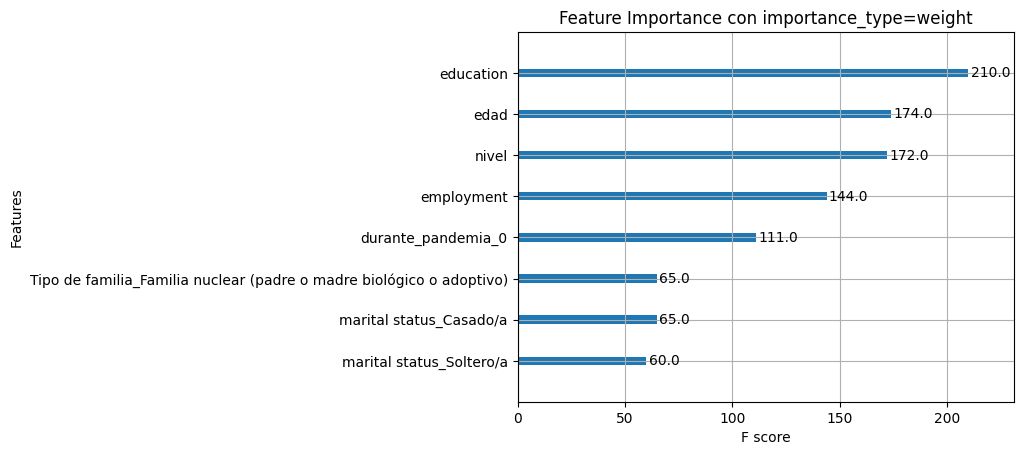

{0: 'género_Hombre', 1: 'género_Mujer', 2: 'género_na', 3: 'beneficio_No', 4: 'beneficio_Sí', 5: 'beneficio_na', 6: 'marital status_Casado/a', 7: 'marital status_Conviviente', 8: 'marital status_Divorciado/a', 9: 'marital status_Separado/a', 10: 'marital status_Soltero/a', 11: 'marital status_Viudo/a', 12: 'marital status_na', 13: 'relationship_Abuela', 14: 'relationship_Abuelo', 15: 'relationship_Madrastra', 16: 'relationship_Madre -- biológica o adoptiva', 17: 'relationship_Madre de acogida', 18: 'relationship_Padrastro', 19: 'relationship_Padre -- biológico o adoptivo', 20: 'relationship_Padre de acogida', 21: 'relationship_na', 22: 'programa_ChCC', 23: 'programa_Lazos', 24: 'rango etario_012', 25: 'rango etario_teen', 26: 'Tipo de familia_Familia de acogida', 27: 'Tipo de familia_Familia ensamblada', 28: 'Tipo de familia_Familia monoparental', 29: 'Tipo de familia_Familia nuclear (padre o madre biológico o adoptivo)', 30: 'Tipo de familia_Otro', 31: 'Tipo de familia_na', 32: 'insti

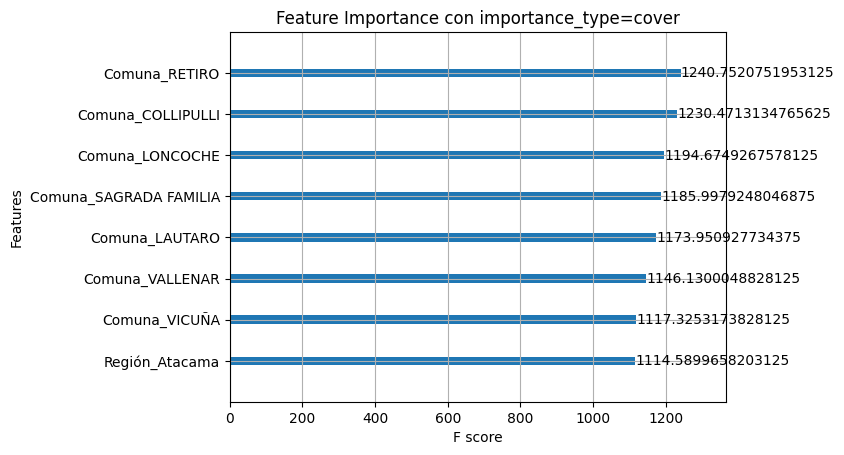

{0: 'género_Hombre', 1: 'género_Mujer', 2: 'género_na', 3: 'beneficio_No', 4: 'beneficio_Sí', 5: 'beneficio_na', 6: 'marital status_Casado/a', 7: 'marital status_Conviviente', 8: 'marital status_Divorciado/a', 9: 'marital status_Separado/a', 10: 'marital status_Soltero/a', 11: 'marital status_Viudo/a', 12: 'marital status_na', 13: 'relationship_Abuela', 14: 'relationship_Abuelo', 15: 'relationship_Madrastra', 16: 'relationship_Madre -- biológica o adoptiva', 17: 'relationship_Madre de acogida', 18: 'relationship_Padrastro', 19: 'relationship_Padre -- biológico o adoptivo', 20: 'relationship_Padre de acogida', 21: 'relationship_na', 22: 'programa_ChCC', 23: 'programa_Lazos', 24: 'rango etario_012', 25: 'rango etario_teen', 26: 'Tipo de familia_Familia de acogida', 27: 'Tipo de familia_Familia ensamblada', 28: 'Tipo de familia_Familia monoparental', 29: 'Tipo de familia_Familia nuclear (padre o madre biológico o adoptivo)', 30: 'Tipo de familia_Otro', 31: 'Tipo de familia_na', 32: 'insti

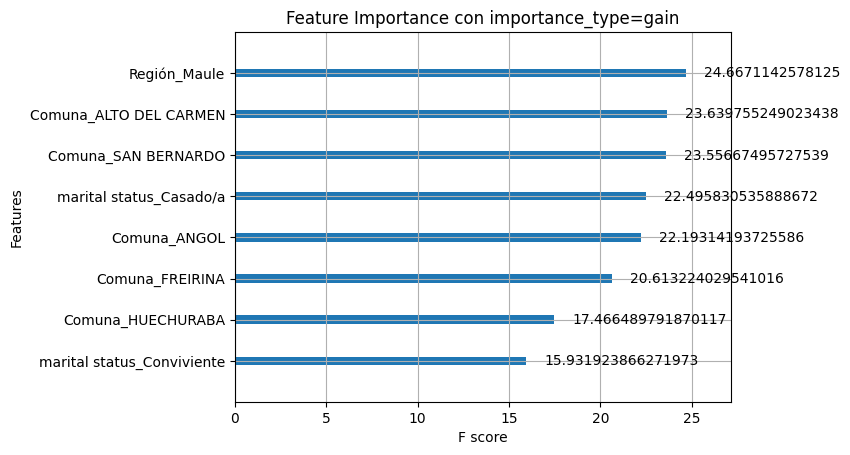

In [ ]:
clf = pipe_xgbc['xgbc']

type_if = ['weight', 'cover', 'gain']

# create dict to use later
myfeatures = pipe_xgbc.named_steps["preprocesamiento"].get_feature_names_out()
dict_features = dict(enumerate(myfeatures))

for t in type_if:

  # Inserte su código aquí
  axsub = xgb.plot_importance(clf, max_num_features=8, importance_type=t)

  # # get the original names back
  # Text_yticklabels = list(axsub.get_yticklabels())
  # print(Text_yticklabels)
  # dict_features = dict(enumerate(myfeatures))
  # print(dict_features)
  # lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
  # # print(lst_yticklabels)
  # lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

  # axsub.set_yticklabels(lst_yticklabels)
  print(dict_features)

  plt.title("Feature Importance con importance_type="+t)
  plt.show()

RFC, ETC y BRFC

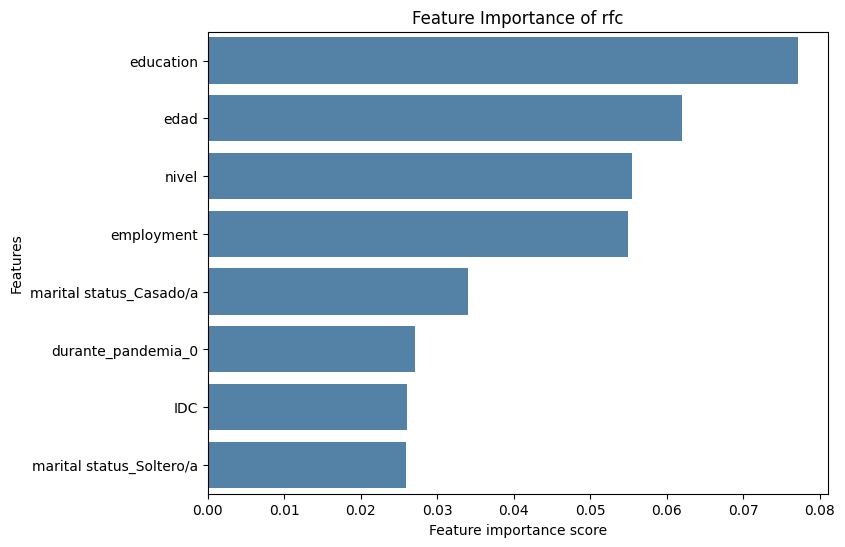

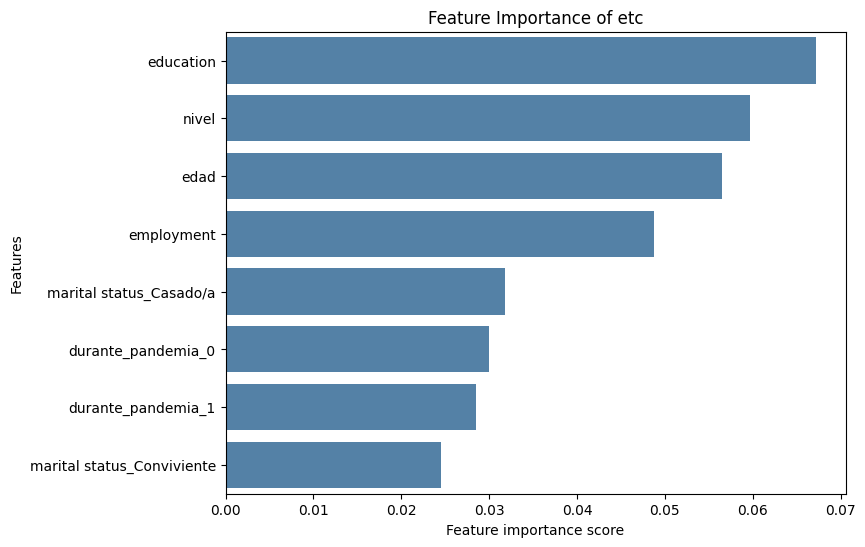

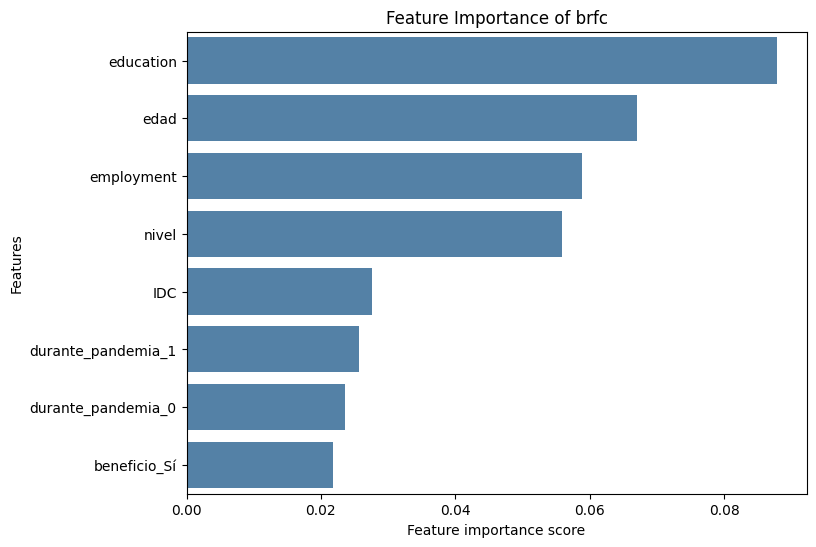

In [ ]:
import seaborn as sns

list_tm = [[pipe_rfc, 'rfc'],
           [pipe_etc, 'etc'],
           [pipe_brfc, 'brfc']]

for m in list_tm:

  clf = m[0][m[1]]

  feature_scores = pd.Series(clf.feature_importances_, index=pipe_xgbc.named_steps["preprocesamiento"].get_feature_names_out()).sort_values(ascending=False)

  f, ax = plt.subplots(figsize=(8, 6))
  ax = sns.barplot(x=feature_scores[:8], y=feature_scores.index[:8], color='steelblue')
  ax.set_title("Feature Importance of " + m[1])
  ax.set_yticklabels(feature_scores.index[:8])
  ax.set_xlabel("Feature importance score")
  ax.set_ylabel("Features")
  plt.show()

KNN: No tiene método propio.

### Shap Values

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.8 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


XGBoost

In [ ]:
clf = pipe_xgbc['xgbc']
X_shap = pipe_xgbc.named_steps["preprocesamiento"].fit_transform(X_train)
explainer = shap.TreeExplainer(clf, X_shap)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


 98%|===================| 6015/6144 [00:39<00:00]       

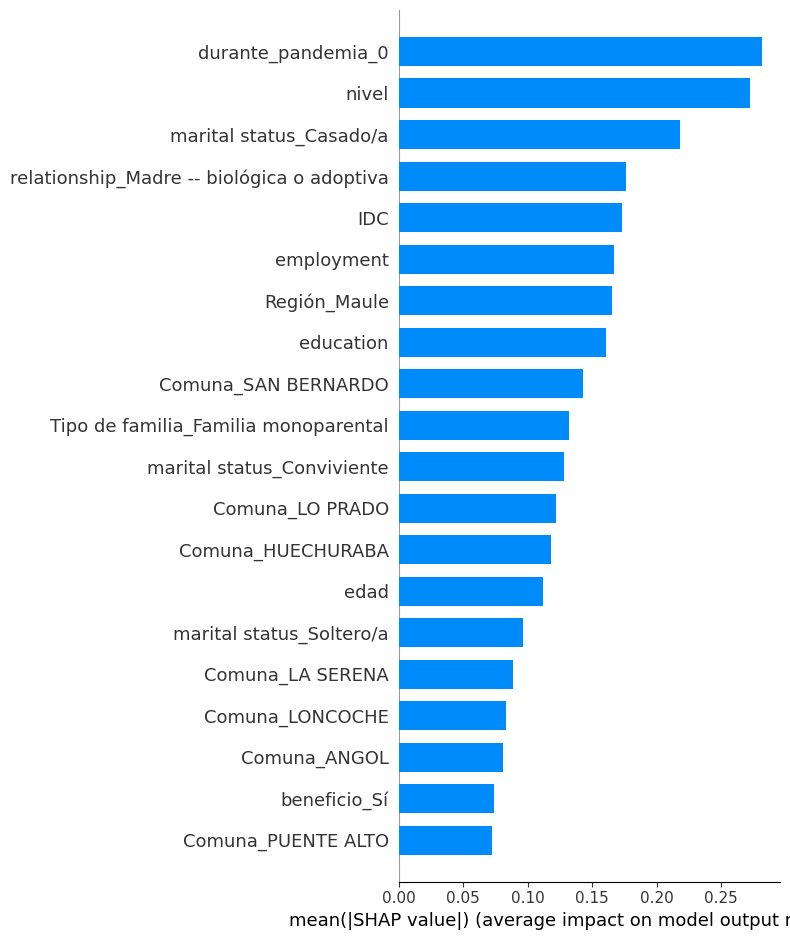

In [ ]:
shap_values = explainer(X_shap)
shap.summary_plot(shap_values, X_shap, plot_type="bar", max_display=20)

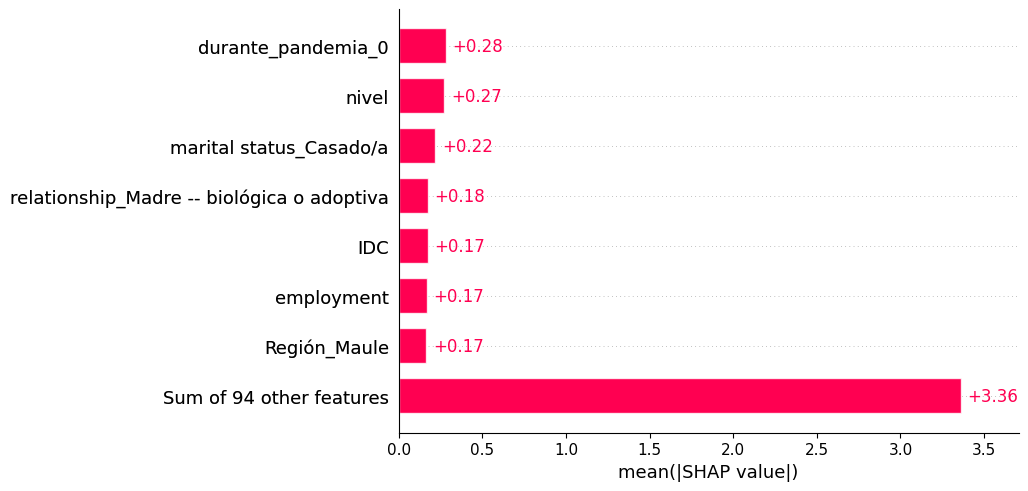

In [ ]:
shap.plots.bar(shap_values, max_display=8)

Analicemos las variables más importantes.

In [ ]:
import numpy as np

# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_shap.columns[shap_values_abs.argsort()[::-1]]

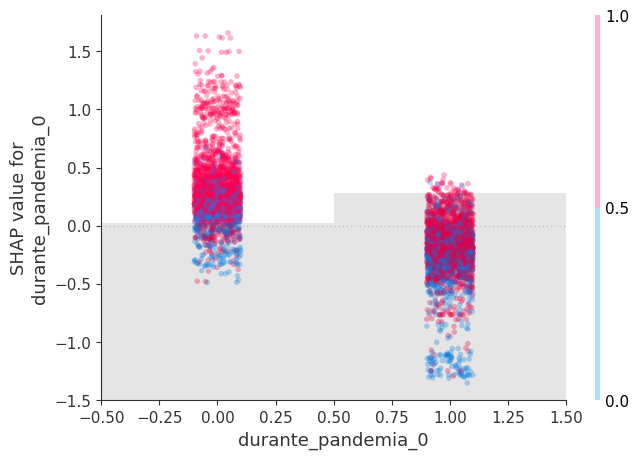

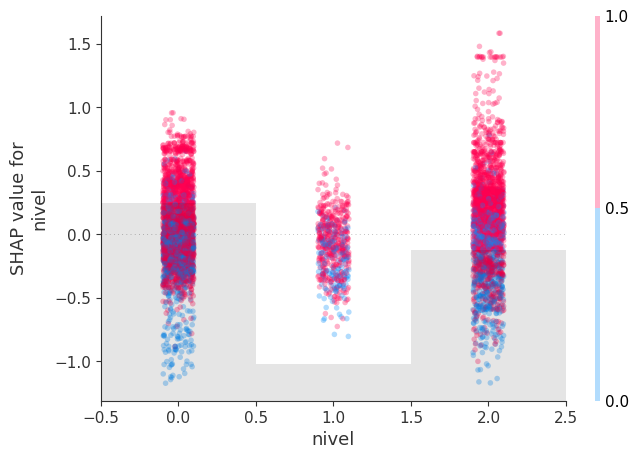

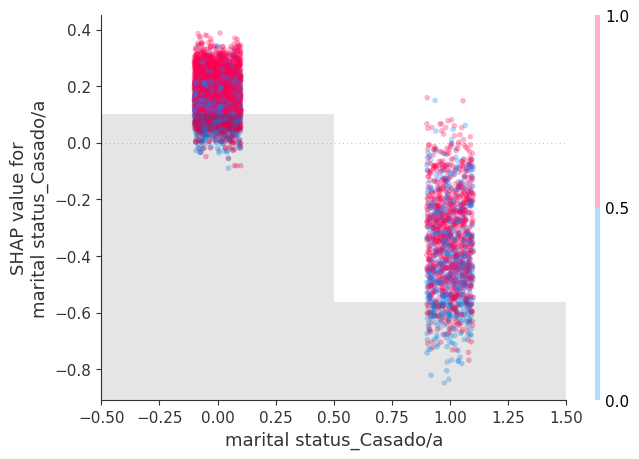

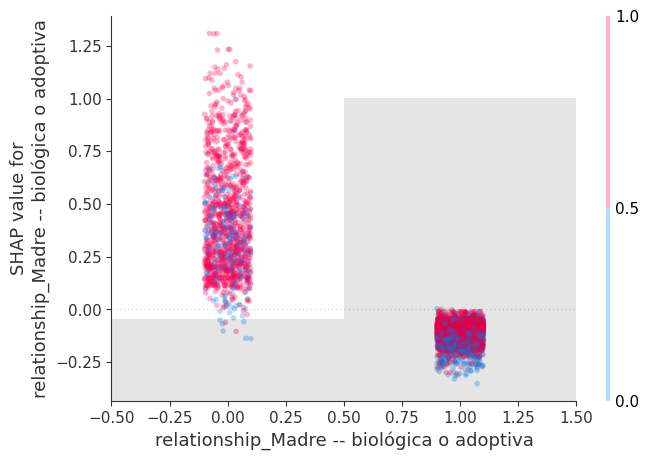

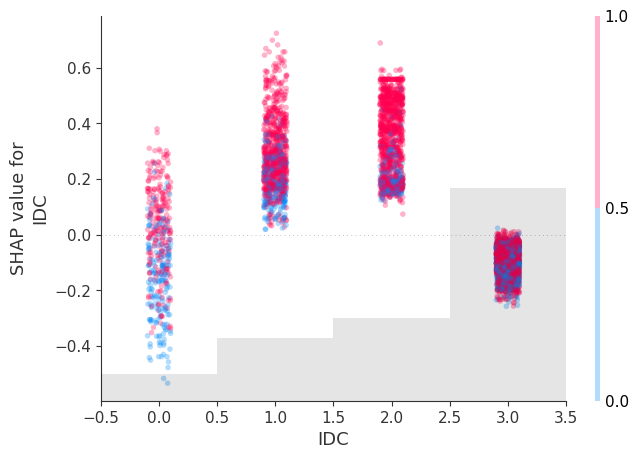

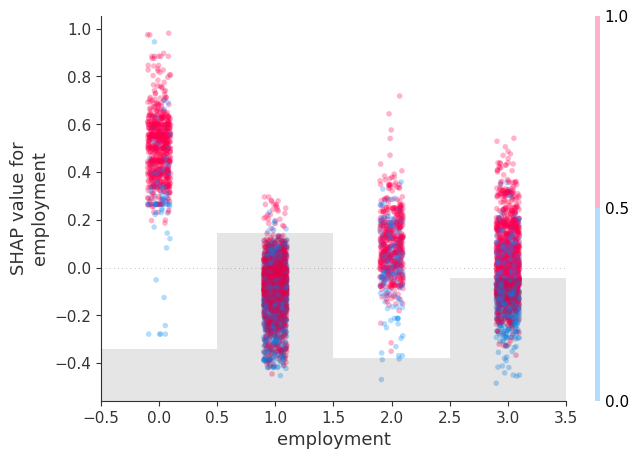

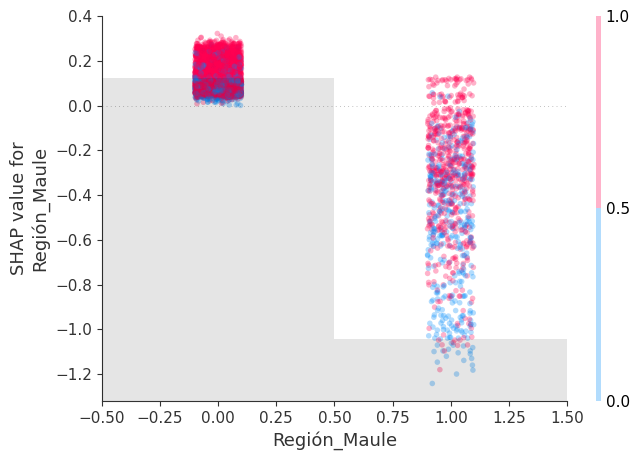

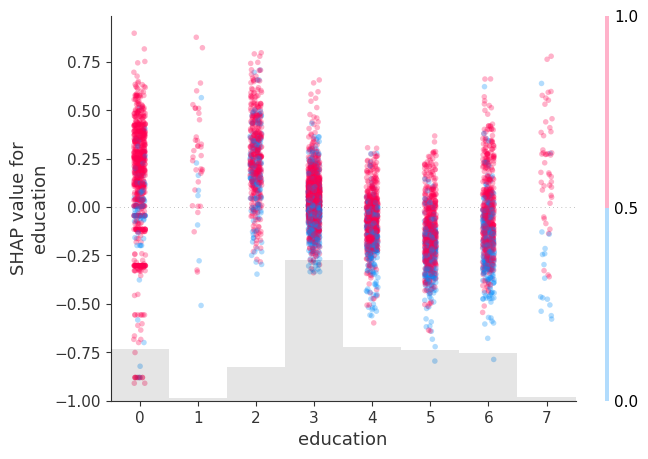

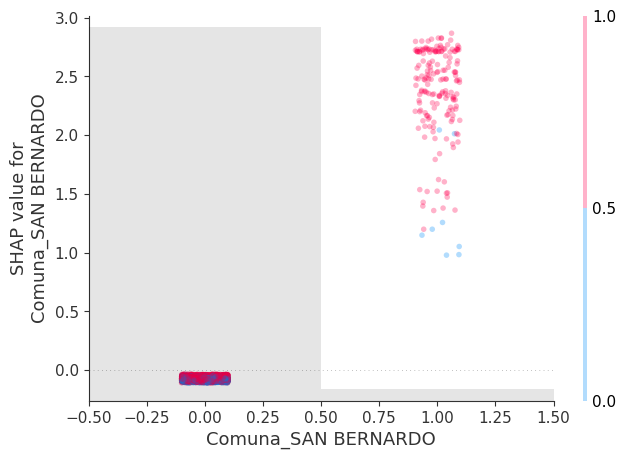

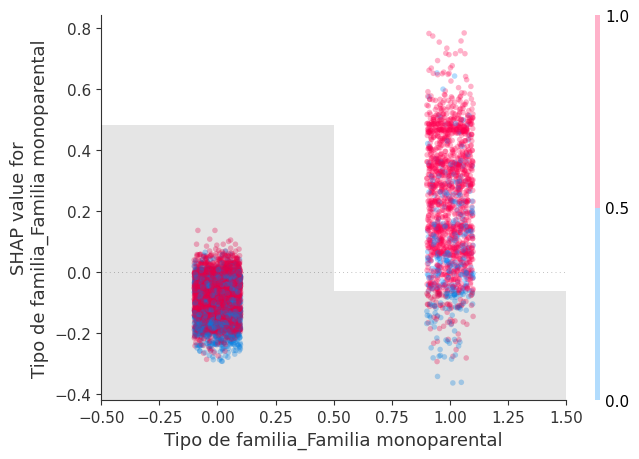

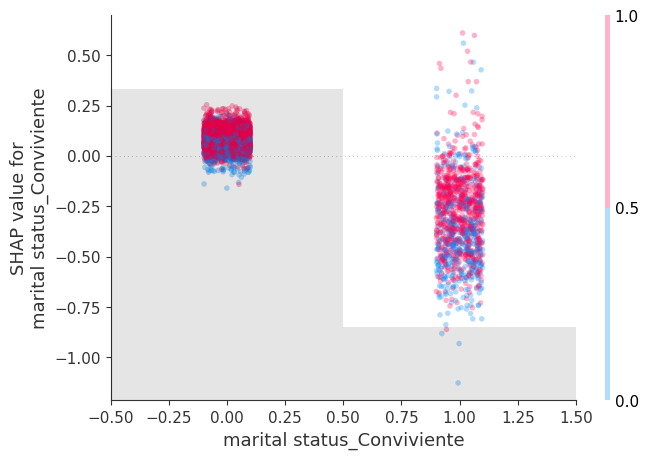

In [ ]:
for name in feature_importance_names[:11]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name], color=y_train.values, alpha=0.3)

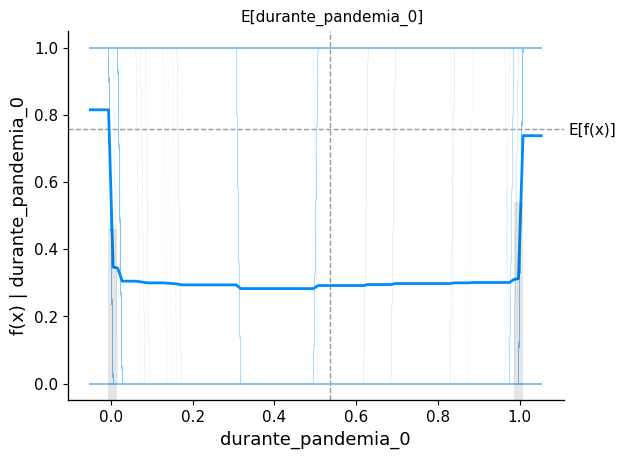

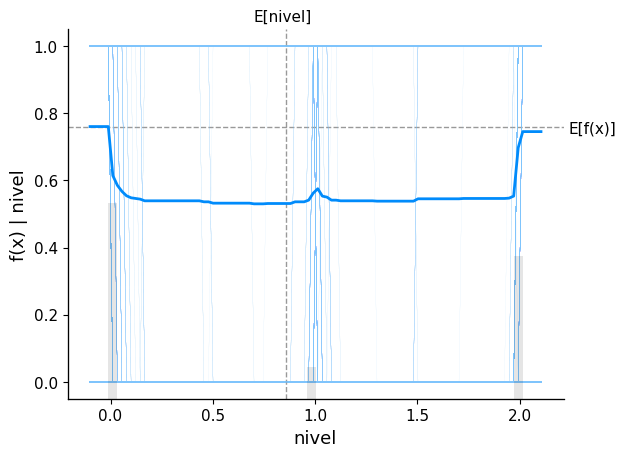

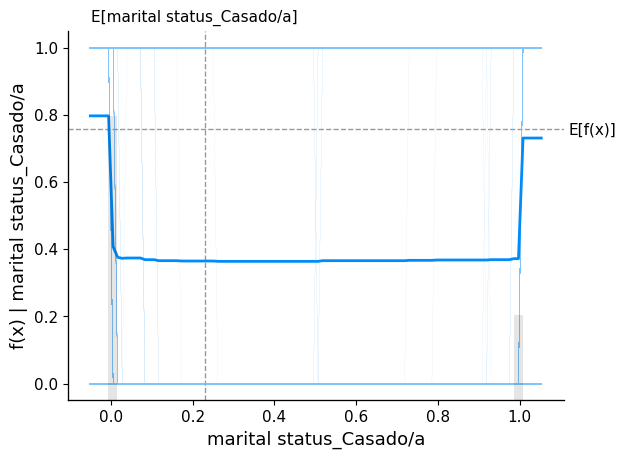

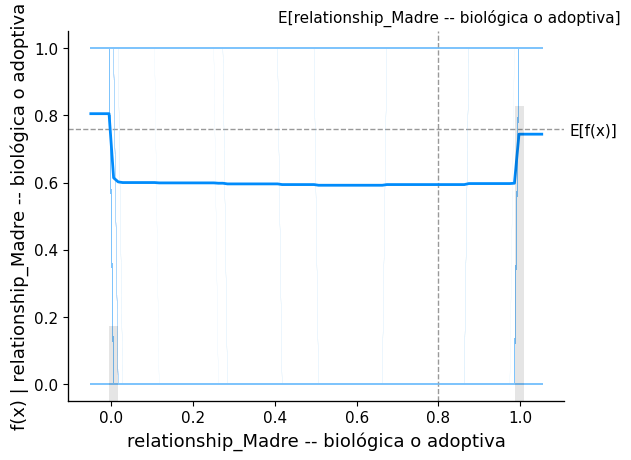

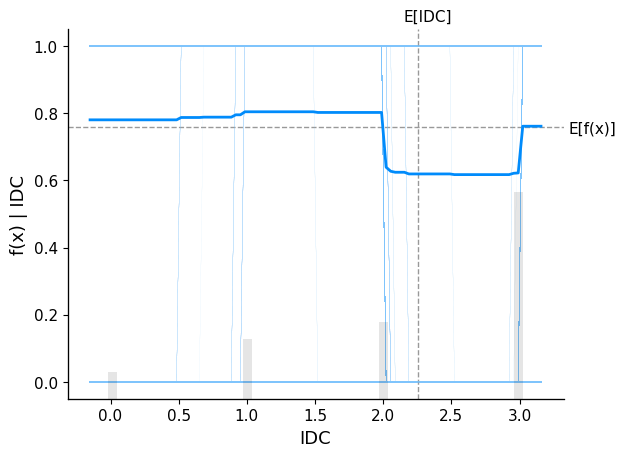

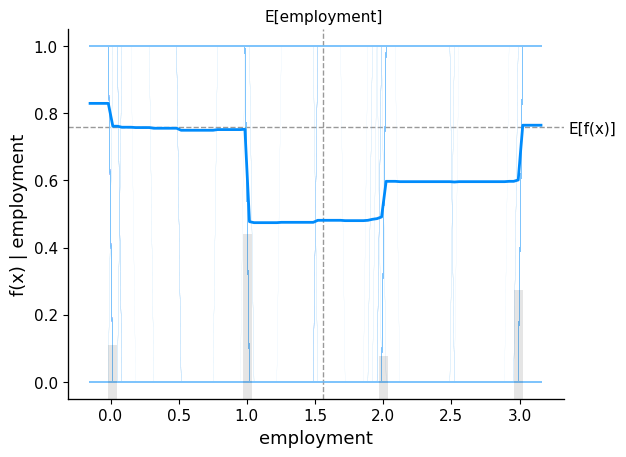

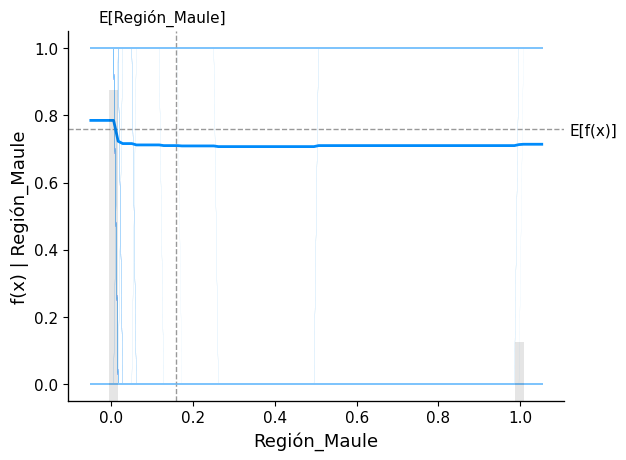

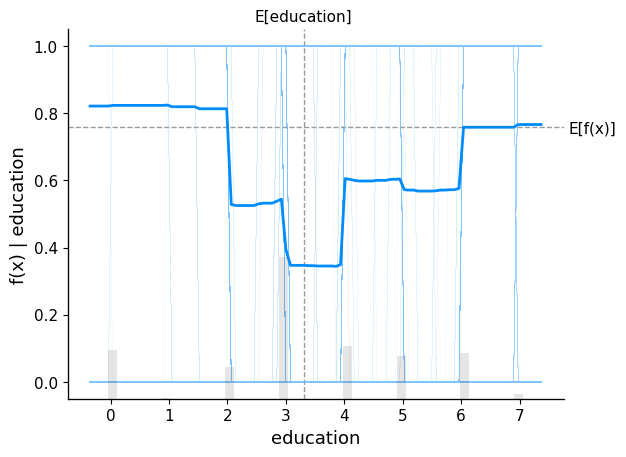

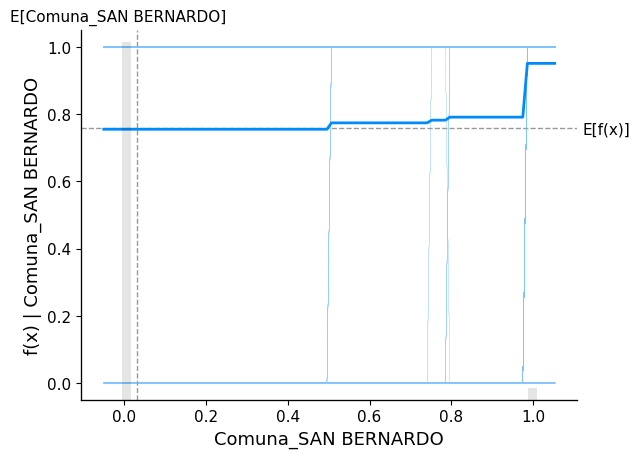

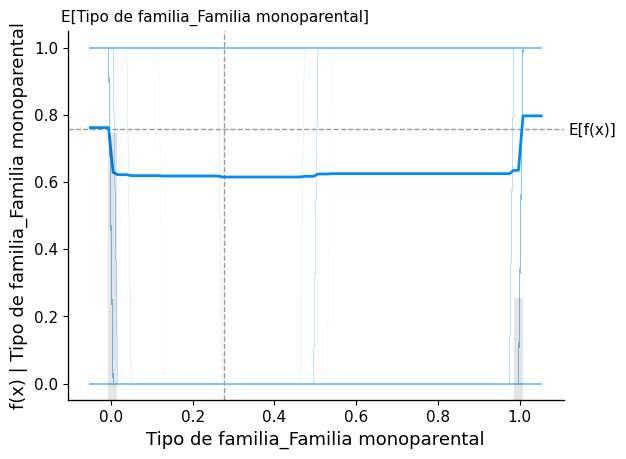

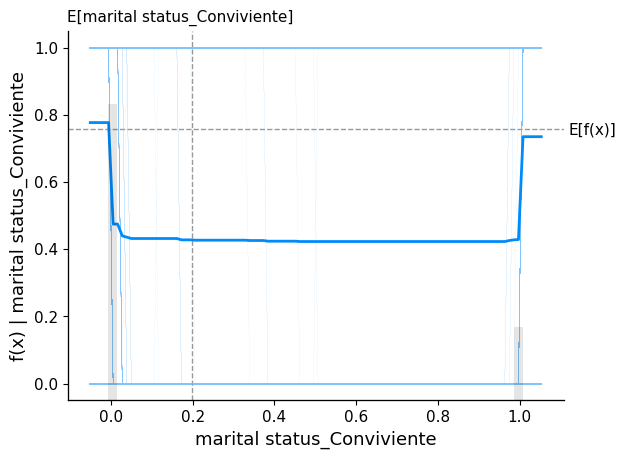

In [ ]:
X1000 = shap.utils.sample(X_shap, 1000)
clf = pipe_xgbc['xgbc']

for f in feature_importance_names[:11]:
  # sample_ind = 1
  shap.partial_dependence_plot(
      f, clf.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=True
  )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


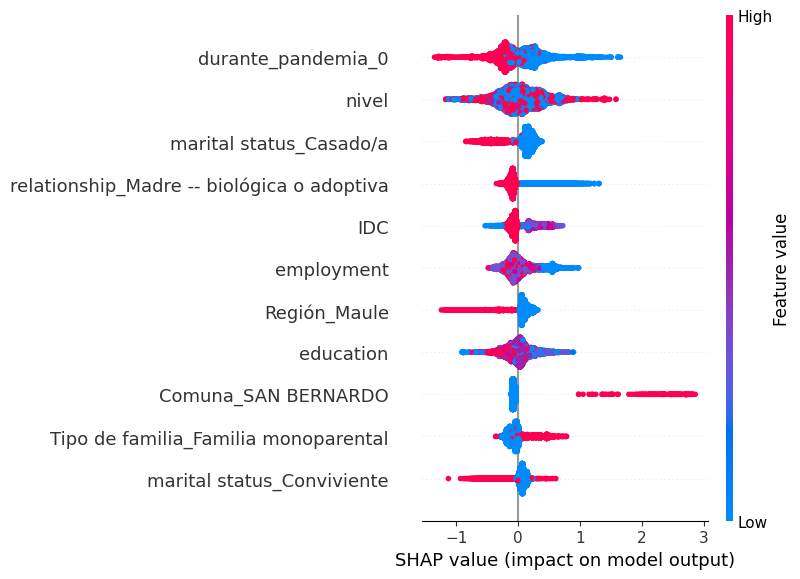

In [ ]:
# Otra forma der ver el plot anterior es la siguiente
shap.summary_plot(shap_values, X_shap, max_display=11)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:].values, X_shap.iloc[:100,:], link='logit', feature_names = pipe_xgbc.named_steps["preprocesamiento"].get_feature_names_out())

### Permutation Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

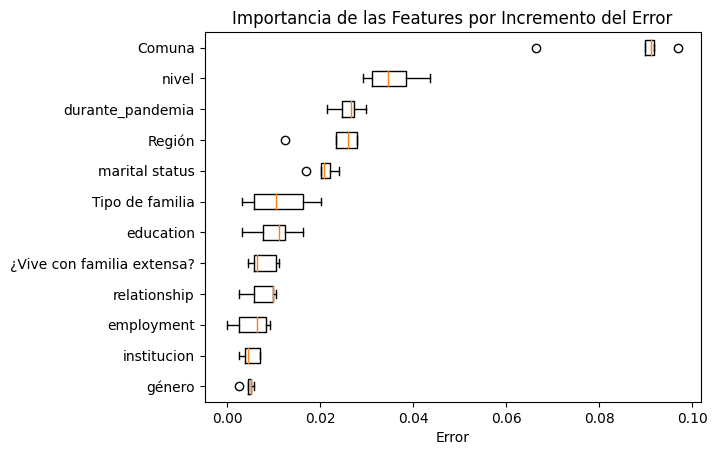

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

clf = pipe_xgbc
# X_shap = pipe_xgbc.named_steps["preprocesamiento"].fit_transform(X_test)
result = permutation_importance(clf, X_test, y_test, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()

plt.boxplot(
    result.importances[perm_sorted_idx][8:].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx][8:],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

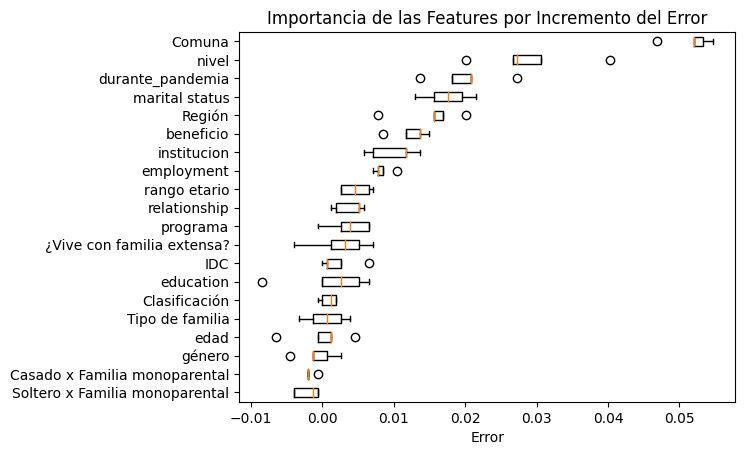

In [ ]:
clf = pipe_rfc
# X_shap = pipe_xgbc.named_steps["preprocesamiento"].fit_transform(X_test)
result = permutation_importance(clf, X_test, y_test, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

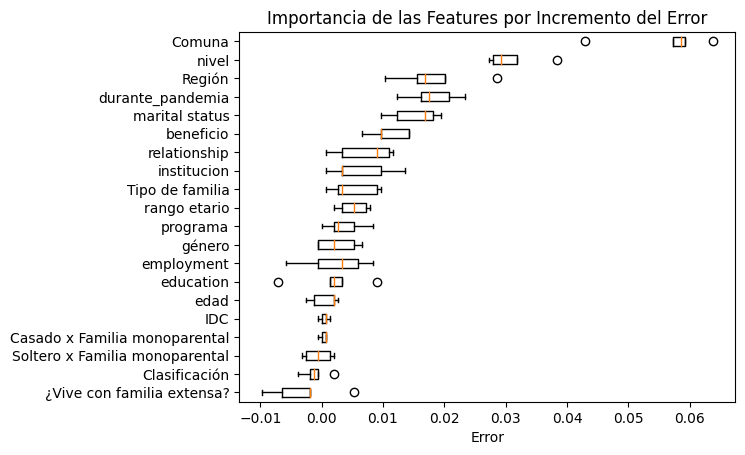

In [ ]:
clf = pipe_etc
# X_shap = pipe_xgbc.named_steps["preprocesamiento"].fit_transform(X_test)
result = permutation_importance(clf, X_test, y_test, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

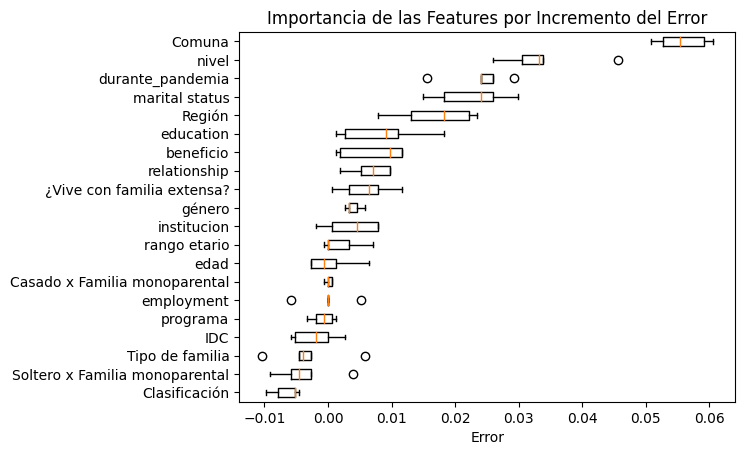

In [ ]:
clf = pipe_brfc
# X_shap = pipe_xgbc.named_steps["preprocesamiento"].fit_transform(X_test)
result = permutation_importance(clf, X_test, y_test, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

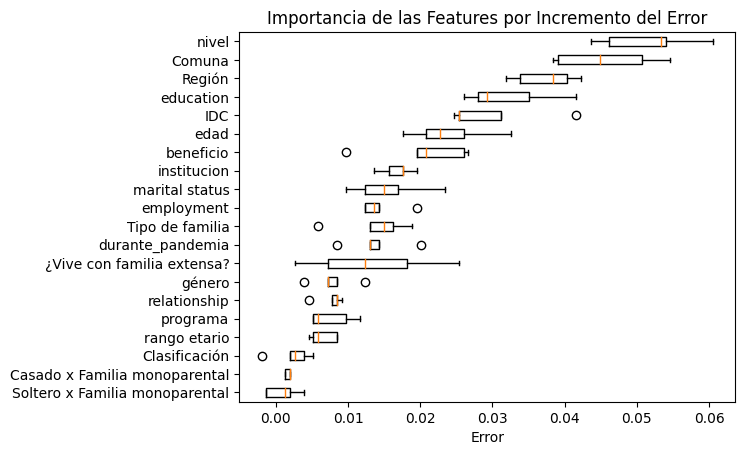

In [ ]:
clf = pipe_knn
# X_shap = pipe_xgbc.named_steps["preprocesamiento"].fit_transform(X_test)
result = permutation_importance(clf, X_test, y_test, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

## UMAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=f3bfae3ba6417012bf3301de28bc52aef7d663d237bb6cce38bcabd0782146ef
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=cd8ff25c46fe82a2ddf63b8b5c63a00879a48fd71c5a165ac84fa0032ae78a95
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
# Paquete para la reducción de dimensionalidad con UMAP
import umap
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import plotly.express as px

In [ ]:
nominales = [
              # 'género',
            #  'beneficio',
             'marital status',
             'relationship',
            #  'programa',
            #  'rango etario',
             'Tipo de familia',
            #  'institucion',
            #  '¿Vive con familia extensa?',
             'durante_pandemia',
            #  'Casado x Familia monoparental',
            #  'Soltero x Familia monoparental',
            #  'Región',
             'Comuna',
            #  'Clasificación'
             ]

ordinales = ['education',
             'employment',
             'nivel',
             'edad',
             'IDC']

In [ ]:
# Orden de las categorías de las variables ordinales
categorias_education = ['Sin información',
                        'Otro',
                        'Enseñanza básica',
                        'Enseñanza media',
                        'Liceo técnico-profesional',
                        'Formación técnica de nivel superior',
                        'Profesional universitaria',
                        'Postgrado universitario']

categorias_employment = ['Sin información',
                         'Sin trabajo',
                         'Media jornada',
                         'Jornada completa']

categorias_nivel = ['AP',
                    'ST',
                    'GR']

categorias_edad = ['na',
                   '0 - 18',
                   '18 - 24',
                   '25 - 34',
                   '35 - 44',
                   '45 - 54',
                   '55 - 64',
                   '65 +']

categorias_IDC = ['Bajo',
                  'Medio bajo',
                  'Medio',
                  'Medio alto']

categorias_ordenadas = [categorias_education,
                        categorias_employment,
                        categorias_nivel,
                        categorias_edad,
                        categorias_IDC]

# One Hot Encoder y Ordinal Encoder
encoder_nominales = OneHotEncoder(sparse=False)
encoder_ordinales = OrdinalEncoder(categories=categorias_ordenadas)

# Column Transformer de preprocesamiento
preprocesamiento1 = ColumnTransformer(
    transformers=[
        ('onehot', encoder_nominales, nominales),
        ('ordinal', encoder_ordinales, ordinales)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [ ]:
pd.set_option('display.max_columns', None)

df_preprocesado = preprocesamiento.transform(df)
df_preprocesado.head()

género_Hombre  género_Mujer  género_na  beneficio_No  beneficio_Sí  \
0            0.0           1.0        0.0           0.0           1.0   
1            0.0           1.0        0.0           0.0           1.0   
2            0.0           1.0        0.0           1.0           0.0   
3            0.0           1.0        0.0           0.0           1.0   
4            1.0           0.0        0.0           1.0           0.0   

   beneficio_na  marital status_Casado/a  marital status_Conviviente  \
0           0.0                      0.0                         0.0   
1           0.0                      0.0                         1.0   
2           0.0                      0.0                         0.0   
3           0.0                      0.0                         0.0   
4           0.0                      0.0                         0.0   

   marital status_Divorciado/a  marital status_Separado/a  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   

   marital status_Soltero/a  marital status_Viudo/a  marital status_na  \
0                       1.0                     0.0                0.0   
1                       0.0                     0.0                0.0   
2                       1.0                     0.0                0.0   
3                       1.0                     0.0                0.0   
4                       1.0                     0.0                0.0   

   relationship_Abuela  relationship_Abuelo  relationship_Madrastra  \
0                  0.0                  0.0                     0.0   
1                  0.0                  0.0                     0.0   
2                  0.0                  0.0                     0.0   
3                  0.0                  0.0                     0.0   
4                  0.0                  0.0                     0.0   

   relationship_Madre -- biológica o adoptiva  relationship_Madre de acogida  \
0                                         1.0                            0.0   
1                                         1.0                            0.0   
2                                         1.0                            0.0   
3                                         1.0                            0.0   
4                                         0.0                            0.0   

   relationship_Padrastro  relationship_Padre -- biológico o adoptivo  \
0                     0.0                                         0.0   
1                     0.0                                         0.0   
2                     0.0                                         0.0   
3                     0.0                                         0.0   
4                     0.0                                         1.0   

   relationship_Padre de acogida  relationship_na  programa_ChCC  \
0                            0.0              0.0            1.0   
1                            0.0              0.0            1.0   
2                            0.0              0.0            1.0   
3                            0.0              0.0            1.0   
4                            0.0              0.0            1.0   

   programa_Lazos  rango etario_012  rango etario_teen  \
0             0.0               1.0                0.0   
1             0.0               1.0                0.0   
2             0.0               1.0                0.0   
3             0.0               1.0                0.0   
4             0.0               1.0                0.0   

   Tipo de familia_Familia de acogida  Tipo de familia_Familia ensamblada  \
0                                 0.0                                 0.0   
1                                 0.0                       

In [ ]:
df[["nivel", "durante_pandemia", "marital status", "Comuna", "education", "edad", "IDC", "relationship", "Tipo de familia"]]

nivel durante_pandemia marital status         Comuna  \
0       AP                1      Soltero/a       COQUIMBO   
1       AP                1    Conviviente       COQUIMBO   
2       AP                1      Soltero/a       PUDAHUEL   
3       AP                1      Soltero/a       PUDAHUEL   
4       AP                1      Soltero/a         PARRAL   
...    ...              ...            ...            ...   
7676    GR                0      Soltero/a      QUILICURA   
7677    GR                0      Soltero/a      QUILICURA   
7678    GR                0    Conviviente  VILLA ALEMANA   
7679    GR                0     Separado/a  VILLA ALEMANA   
7680    GR                0       Casado/a  VILLA ALEMANA   

                                education     edad         IDC  \
0                         Enseñanza media  25 - 34  Medio alto   
1                         Enseñanza media  25 - 34  Medio alto   
2     Formación técnica de nivel superior  25 - 34  Medio alto   
3               Liceo técnico-profesional  25 - 34  Medio alto   
4     Formación técnica de nivel superior  35 - 44  Medio bajo   
...                                   ...      ...         ...   
7676                     Enseñanza básica  25 - 34  Medio alto   
7677                     Enseñanza básica  25 - 34  Medio alto   
7678                      Enseñanza media  35 - 44  Medio alto   
7679                      Enseñanza media  45 - 54  Medio alto   
7680                      Enseñanza media  45 - 54  Medio alto   

                       relationship  \
0     Madre -- biológica o adoptiva   
1     Madre -- biológica o adoptiva   
2     Madre -- biológica o adoptiva   
3     Madre -- biológica o adoptiva   
4     Padre -- biológico o adoptivo   
...                             ...   
7676  Madre -- biológica o adoptiva   
7677  Madre -- biológica o adoptiva   
7678  Madre -- biológica o adoptiva   
7679  Madre -- biológica o adoptiva   
7680  Madre -- biológica o adoptiva   

                                        Tipo de familia  
0                                  Familia monoparental  
1                                  Familia monoparental  
2                                  Familia monoparental  
3                                  Familia monoparental  
4                                    Familia ensamblada  
...                                                 ...  
7676                               Familia monoparental  
7677                                                 na  
7678  Familia nuclear (padre o madre biológico o ado...  
7679                               Familia monoparental  
7680                                                 na  

[7681 rows x 9 columns]

In [ ]:
# Se genera el muestreo aleatorio
# df_sample = df_preprocesado.sample(25000, random_state=33)

In [ ]:
# Las variables escaladas se almacenan en scaled_features
scaled_features = MinMaxScaler().fit_transform(df_preprocesado)

# Se instancia UMAP
umap = umap.UMAP()

# Se aplica la proyección
features_umap_embedded = umap.fit_transform(scaled_features)
features_umap_embedded

array([[20.462795 ,  6.0441313],
       [15.481684 ,  0.8295038],
       [14.519485 ,  9.168737 ],
       ...,
       [ 3.2801812, 13.1198845],
       [ 3.4810557, 12.4798355],
       [ 0.7084317, 13.255254 ]], dtype=float32)

In [ ]:
# Se registran las proyecciones 2D en el dataframe
df_preprocesado["x_umap"] = features_umap_embedded[:, 0]
df_preprocesado["y_umap"] = features_umap_embedded[:, 1]

In [ ]:
# La variable target fraud_bool se convierte a tipo categórica
df_preprocesado['target'] = df['Tiene NA general'].astype('category')

# Visualización de la proyección
px.scatter(
    df_preprocesado,
    x="x_umap",
    y="y_umap",
    color='target'
)